<a href="https://colab.research.google.com/github/DineshaS14/TokyoOlympicPrediction/blob/main/OlympicPredictorDataSet2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas openpyxl

In [18]:
# Hypothesis
"""- Countries that won more medals in the 2021 Tokyo Olympics are likely to perform well in the 2024 Paris Olympics.
- Countries with more athletes and coaches might achieve higher medal counts in the Olympics.
- The balance between male and female participants could impact a country's overall medal performance."""

"- Countries that won more medals in the 2021 Tokyo Olympics are likely to perform well in the 2024 Paris Olympics.\n- Countries with more athletes and coaches might achieve higher medal counts in the Olympics.\n- The balance between male and female participants could impact a country's overall medal performance."

In [ ]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import plotly.express as px

# Changing xlsx to csv files

# Read the XLSX file
athletesXlsx = 'Athletes.xlsx'
ath = pd.read_excel(athletesXlsx)
coachesXlsx = 'Coaches.xlsx'
coaches = pd.read_excel(coachesXlsx)
entriesGenderXslx = 'EntriesGender.xlsx'
entriesGender = pd.read_excel(entriesGenderXslx)
medalsXlsx = 'Medals.xlsx'
medals = pd.read_excel(medalsXlsx)
teamsXlsx = 'Teams.xlsx'
teams = pd.read_excel(teamsXlsx)

# Convert to CSV
athletesCsv = 'Athletes.csv'
ath.to_csv(athletesCsv, index=False)
coachesCsv = 'Coaches.csv'
coaches.to_csv(coachesCsv, index=False)
entriesGenderCsv = 'EntriesGender.csv'
entriesGender.to_csv(entriesGenderCsv, index=False)
medalsCsv = 'Medals.csv'
medals.to_csv(medalsCsv, index=False)
teamsCsv = 'Teams.csv'
teams.to_csv(teamsCsv, index=False)

In [7]:
# Knowing and pre processing Data
dfAthletes = pd.read_csv('Athletes.csv')
dfAthletes.head() # Showing first 5 data of Athletes.csv



,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [8]:
dfCoaches = pd.read_csv('Coaches.csv')
dfCoaches.head() # Showing first 5 data of Coaches.csv

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [9]:
dfEntriesGender = pd.read_csv('EntriesGender.csv')
dfEntriesGender.head() # Showing first 5 data of EntriesGender.csv

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
dfMedals = pd.read_csv('Medals.csv')
dfMedals.head() # Showing first 5 data of Medals.csv

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [11]:
dfTeams = pd.read_csv('Teams.csv')
dfTeams.head() # Showing first 5 data of Teams.csv

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [17]:
# Function to perform analysis on a DataFrame.
# Prints the first few rows, Shape of the data, number of unique vals.
# Duplicate rows, and missing vals.
def analyze_dataframe(df, name):
    print(f"Analysis for {name} DataFrame:")
    print(df.head())
    print()
    print(f"Number of rows and columns are: {df.shape}")
    print()
    print(df.info())
    print()
    print(df.nunique())
    print()
    print(f"Number of duplicated rows: {df.duplicated().sum()}")
    print()
    print(f"Number of missing values:\n{df.isnull().sum()}")
    print("-" * 50)

# Performing analysis on each DataFrame.
analyze_dataframe(dfAthletes, 'Athletes')
analyze_dataframe(dfCoaches, 'Coaches')
analyze_dataframe(dfEntriesGender, 'EntriesGender')
analyze_dataframe(dfMedals, 'Medals')
analyze_dataframe(dfTeams, 'Teams')

Analysis for Athletes DataFrame:
                Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball

Number of rows and columns are: (11085, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB
None

Name          11062
NOC             206
Discipline       46
dtype: int64

Number of duplicated rows: 1

Number of missing values:
Name          0
NOC           0
Discipline    0
dtype: int64
--------------------------------------------------
Analysis for Coaches Dat

In [19]:
# Data Cleaning approach
"""
Athletes DataFrame:
Duplicates: 1 duplicated row found.
Actions: Remove duplicated rows.

Coaches DataFrame:
Missing Values: 'Event' column has 145 missing values.
Duplicates: 1 duplicated row found.
Actions: Remove duplicated rows.
Decide on handling missing values in the 'Event' column (filling with a default value or dropping rows).

Medals DataFrame:
Missing Values: Some columns have missing values (Gold: 14, Silver: 17, Bronze: 21, Total: 30, Rank: 67, Rank by Total: 30).
Actions: Decide on handling missing values (depending on the impact on analysis).


"""

"\nAthletes DataFrame:\nDuplicates: 1 duplicated row found.\nActions: Remove duplicated rows.\n\nCoaches DataFrame:\nMissing Values: 'Event' column has 145 missing values.\nDuplicates: 1 duplicated row found.\nActions: Remove duplicated rows.\nDecide on handling missing values in the 'Event' column (filling with a default value or dropping rows).\n\nMedals DataFrame:\nMissing Values: Some columns have missing values (Gold: 14, Silver: 17, Bronze: 21, Total: 30, Rank: 67, Rank by Total: 30).\nActions: Decide on handling missing values (depending on the impact on analysis).\n\n\n"

In [23]:
# Data Cleaning
# Cleaning Athletes DataFrame
dfAthletesCleaned = dfAthletes.drop_duplicates()

# Cleaning Coaches DataFrame
dfCoachesCleaned = dfCoaches.drop_duplicates()

# Fill missing values in 'Event' column with 'Unknown'
dfCoachesCleaned.loc[:, 'Event'] = dfCoachesCleaned['Event'].fillna('Unknown')
# .loc ensures that Pandas correctly interprets my intention to modify the DataFrame

# Cleaning Medals DataFrame (example of handling missing values)
dfMedalsCleaned = dfMedals.dropna(subset=['Gold', 'Silver', 'Bronze', 'Total', 'Rank', 'Rank by Total'])

# No immediate cleaning needed for EntriesGender and Teams DataFrames
"""
Currently we have updated sets of
dfAthletesCleaned
dfCoachesCleaned
dfEntriesGender
dfMedalsCleaned
dfTeams

"""


'\nCurrently we have updated sets of\ndfAthletesCleaned\ndfCoachesCleaned\ndfEntriesGender\ndfMedalsCleaned\ndfTeams\n\n'

In [38]:
# Data Visualization

# Using Plotly Express: Good for hovering over data points which provides detailed information.

# Example 1: Distribution of Total Medals
fig = px.histogram(dfMedalsCleaned, x='Total', nbins=20, title='Distribution of Total Medals')
fig.update_layout(xaxis_title='Total Medals', yaxis_title='Frequency')
fig.show()
# Histogram showing the distribution of total medals won by countries

# Example 2: Relationship between Athlete Count and Total Medals
fig = px.scatter(dfAthletesCleaned, x='NOC', y='Discipline', color='NOC',
                 title='Relationship between Number of Athletes and Country',
                 labels={'NOC': 'Country', 'Discipline': 'Number of Athletes'})
fig.show()

# Scatter plot shows the relationship between the number of athletes and total medals won by countries.
# Each point is colored by country region, enabling interactive exploration.

# Example 3: Correlation Matrix (using heatmap)
# Selecting numeric columns for correlation analysis
# Select relevant numeric columns for correlation analysis
numeric_columns = ['Athletes Count', 'Coaches Count', 'Total Medals']

# Compute correlation matrix
dfs = [dfAthletesCleaned, dfCoachesCleaned, dfEntriesGender, dfMedalsCleaned, dfTeams]
df_concat = pd.concat(dfs, axis=1)

# Check the column names in df_concat
print(df_concat.columns)

# Adjust numeric_columns based on the actual column names in df_concat
numeric_columns = ['Female', 'Male', 'Total']  # Adjust these names based on your actual column names for analysis

# Compute correlation matrix
corr_matrix = df_concat[numeric_columns].corr()

# Plot heatmap using Plotly Express
# Plot heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                labels=dict(color='Correlation Coefficient', x='Variables', y='Variables'),
                color_continuous_scale='RdBu',
                title='Correlation Matrix of Female Participants, Male Participants, and Total Medals')
fig.show()

# HeatMap

# Example 4: Boxplot of Medal Counts by Team/NOC
fig = px.box(dfMedalsCleaned, x='Team/NOC', y='Total',
             title='Medal Counts by Team/NOC',
             labels={'Team/NOC': 'Country', 'Total': 'Total Medals'})
fig.update_xaxes(categoryorder='total descending')  # Sort x-axis by total medals
fig.show()
# Box plot showing the distribution of total medals won by countries within different regions


Index(['Name', 'NOC', 'Discipline', 'Name', 'NOC', 'Discipline', 'Event',
       'Discipline', 'Female', 'Male', 'Total', 'Rank', 'Team/NOC', 'Gold',
       'Silver', 'Bronze', 'Total', 'Rank by Total', 'Name', 'Discipline',
       'NOC', 'Event'],
      dtype='object')


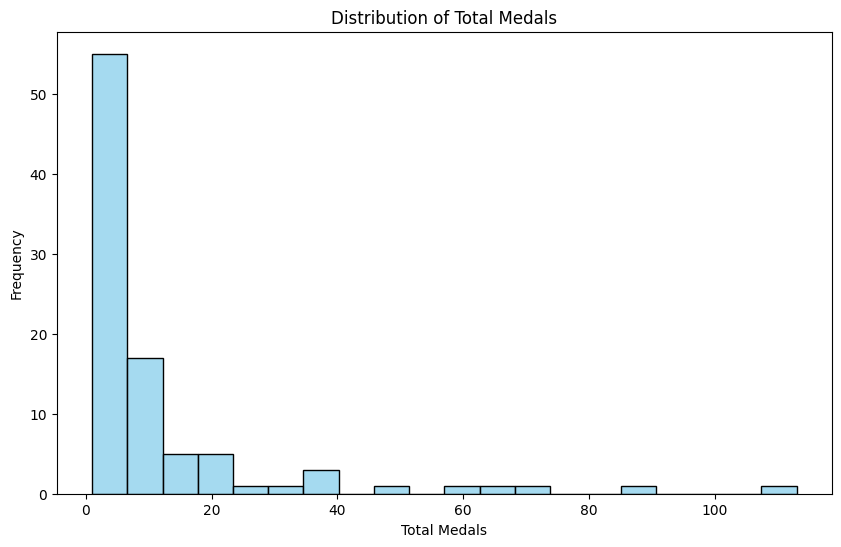

Columns in df_concat: Index(['Name', 'NOC', 'Discipline', 'Name', 'NOC', 'Discipline', 'Event',
       'Discipline', 'Female', 'Male', 'Total', 'Rank', 'Team/NOC', 'Gold',
       'Silver', 'Bronze', 'Total', 'Rank by Total', 'Name', 'Discipline',
       'NOC', 'Event', 'Total Athletes', 'Total Medals'],
      dtype='object')
Columns in dfEntriesGender: Index(['Discipline', 'Female', 'Male', 'Total'], dtype='object')
Columns in df_concat: Index(['Name', 'NOC', 'Discipline', 'Name', 'NOC', 'Discipline', 'Event',
       'Discipline', 'Female', 'Male', 'Total', 'Rank', 'Team/NOC', 'Gold',
       'Silver', 'Bronze', 'Total', 'Rank by Total', 'Name', 'Discipline',
       'NOC', 'Event', 'Total Athletes', 'Total Medals'],
      dtype='object')
Columns in dfEntriesGender: Index(['Discipline', 'Female', 'Male', 'Total'], dtype='object')
Common key 'NOC' not found in one or both DataFrames. Check column names.


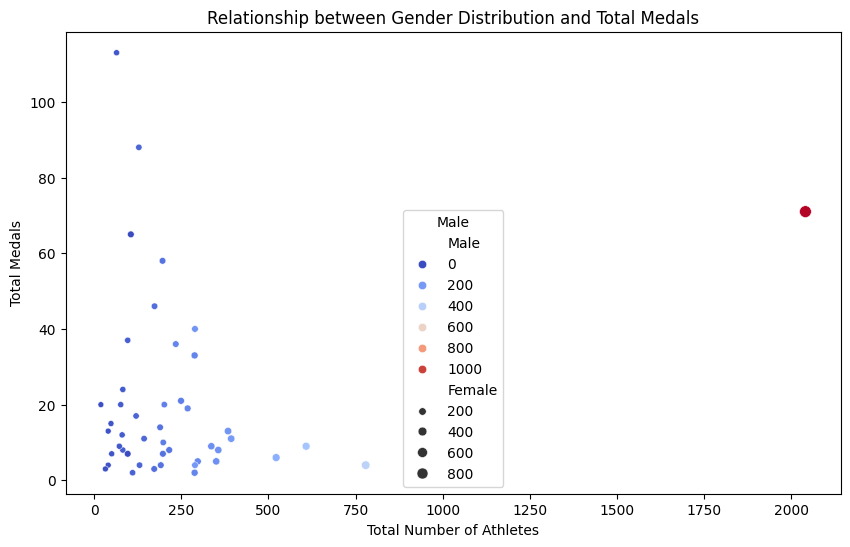

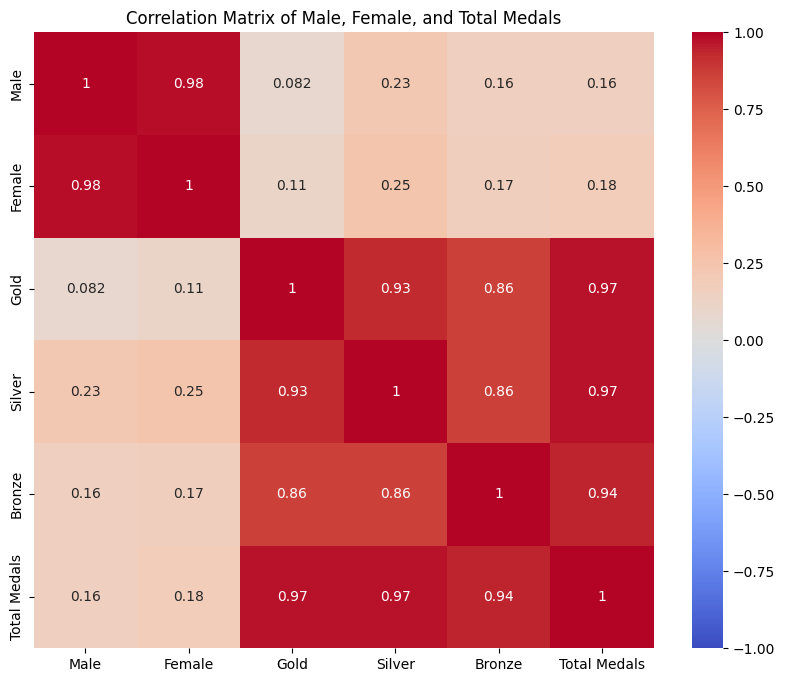

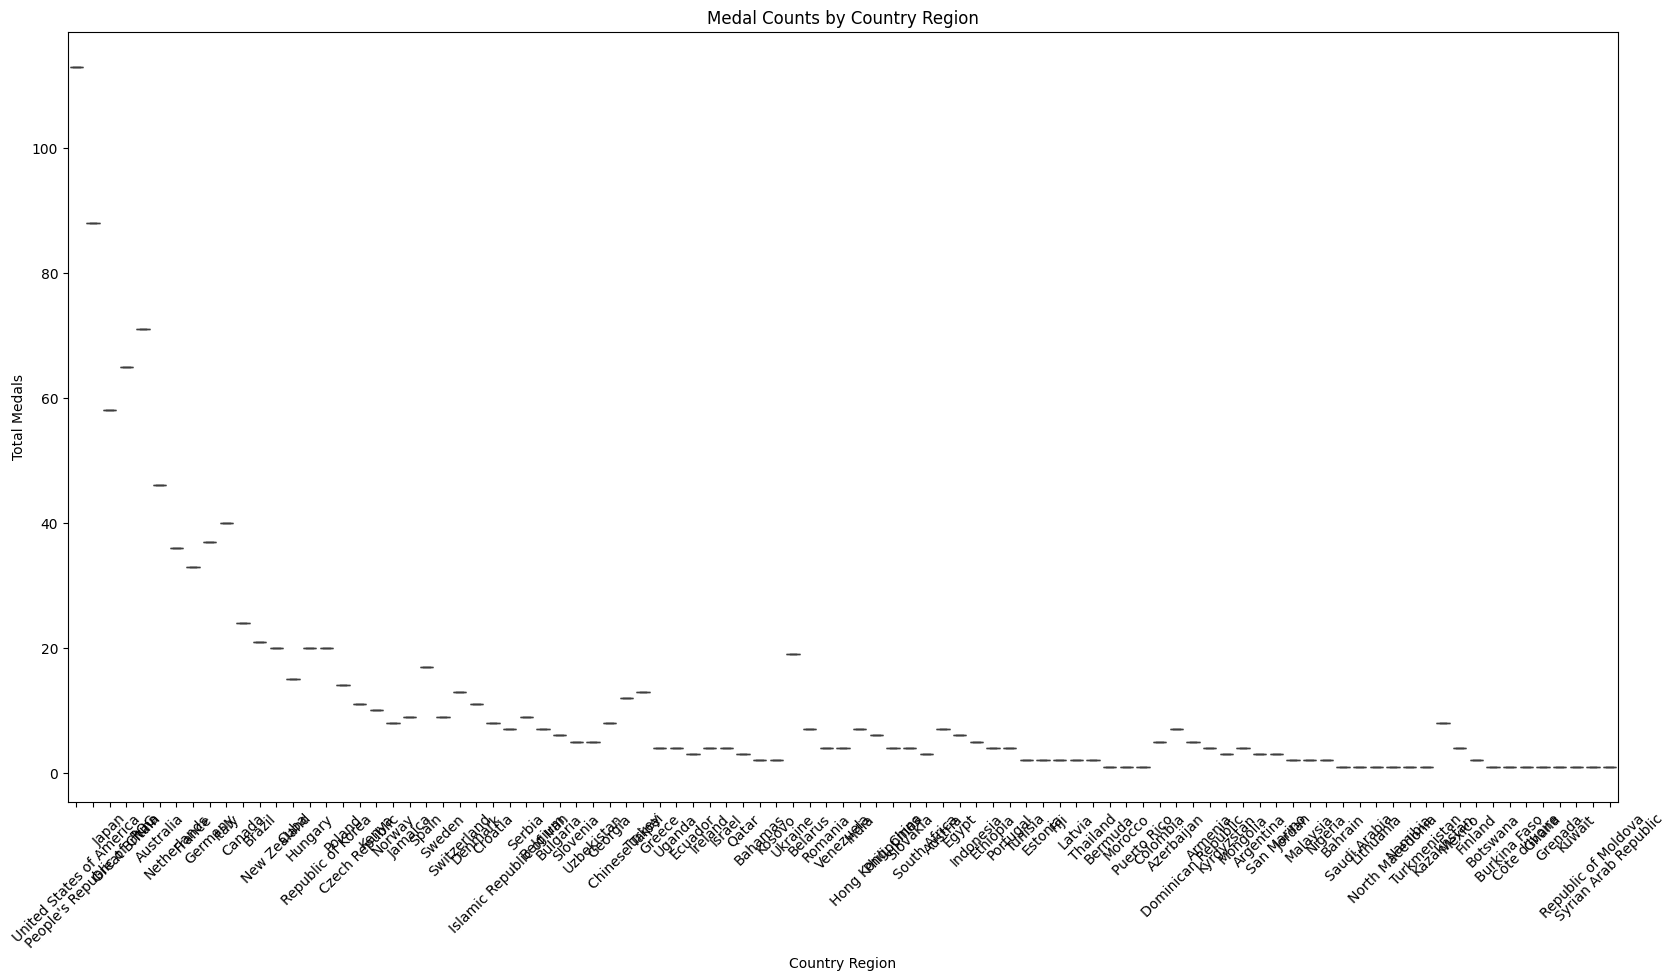

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example 1: Distribution of Total Medals (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(dfMedalsCleaned['Total'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.show()

# Example 2: Relationship between Athlete Count and Total Medals (Scatter Plot)

# Example common key assuming 'NOC' is unique
common_key = 'NOC'

if common_key in df_concat.columns and common_key in dfEntriesGender.columns:
    # Perform the merge based on the common key
    df_concat = pd.merge(df_concat, dfEntriesGender, on=common_key, how='left')

    # Calculate Total Athletes and Total Medals as before
    df_concat['Total Athletes'] = df_concat['Male'] + df_concat['Female']
    df_concat['Total Medals'] = df_concat['Gold'] + df_concat['Silver'] + df_concat['Bronze']

    # Example: Plotting or further analysis using the merged data
else:
    print(f"Common key '{common_key}' not found in one or both DataFrames. Check column names.")

# Calculate Total Athletes
df_concat['Total Athletes'] = df_concat['Male'] + df_concat['Female']

# Calculate Total Medals
df_concat['Total Medals'] = df_concat['Gold'] + df_concat['Silver'] + df_concat['Bronze']

# Example 3: Relationship between Gender Distribution and Total Medals (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Athletes', y='Total Medals', data=df_concat, hue='Male', palette='coolwarm', size='Female')
plt.title('Relationship between Gender Distribution and Total Medals')
plt.xlabel('Total Number of Athletes')
plt.ylabel('Total Medals')
plt.legend(title='Male')
plt.show()

# Example 3: Correlation Matrix (Heatmap)
numeric_columns = ['Male', 'Female', 'Gold', 'Silver', 'Bronze', 'Total Medals']  # Adjust column names as per df_concat structure
corr_matrix = df_concat[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Male, Female, and Total Medals')
plt.show()

# Example 4: Boxplot of Medal Counts by Country Region
plt.figure(figsize=(20, 10))
sns.boxplot(x=dfMedalsCleaned['Team/NOC'], y=df_concat['Total Medals'])
plt.title('Medal Counts by Country Region')
plt.xlabel('Country Region')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

In [90]:
from sklearn.linear_model import LinearRegression
from collections import defaultdict

# Initialize a defaultdict to store coach counts per country
coach_counts = defaultdict(int)

# Iterate through dfCoachesCleaned and count coaches per country
for index, row in dfCoachesCleaned.iterrows():
    country = row['NOC']
    coach_counts[country] += 1

# Convert defaultdict to a regular dictionary (if needed)
coach_counts = dict(coach_counts)

# Get the top countries based on medal ranks
top_countries = dfMedalsCleaned.sort_values(by='Rank').head(20)['Team/NOC'].tolist()

# Initialize top_coach_counts as a dictionary of dictionaries
top_coach_counts = {country: {'Coach Count': 0, 'Total Athletes': 0, 'Total Medals': 0} for country in top_countries}

# Update coach counts in top_coach_counts
for country, count in coach_counts.items():
    if country in top_coach_counts:
        top_coach_counts[country]['Coach Count'] = count

# Update 'Total Athletes' count in top_coach_counts
for index, row in dfAthletesCleaned.iterrows():
    country = row['NOC']
    if country in top_coach_counts:
        # Assuming each row represents one athlete
        top_coach_counts[country]['Total Athletes'] += 1

# Update 'Total Medals' count in top_coach_counts
for index, row in dfMedalsCleaned.iterrows():
    country = row['Team/NOC']
    if country in top_coach_counts:
        # Assuming the medals count is in a column named 'Total Medals' in dfMedalsCleaned
        top_coach_counts[country]['Total Medals'] += row['Total']

# Display aggregated data for top countries
for country, data in top_coach_counts.items():
    print(f"Country: {country}, Coach Count: {data['Coach Count']}, Total Athletes: {data['Total Athletes']}, Total Medals: {data['Total Medals']}")

Country: United States of America, Coach Count: 28, Total Athletes: 615, Total Medals: 113
Country: People's Republic of China, Coach Count: 12, Total Athletes: 401, Total Medals: 88
Country: Japan, Coach Count: 35, Total Athletes: 586, Total Medals: 58
Country: Great Britain, Coach Count: 7, Total Athletes: 366, Total Medals: 65
Country: ROC, Coach Count: 12, Total Athletes: 318, Total Medals: 71
Country: Australia, Coach Count: 22, Total Athletes: 470, Total Medals: 46
Country: Netherlands, Coach Count: 10, Total Athletes: 274, Total Medals: 36
Country: France, Coach Count: 10, Total Athletes: 377, Total Medals: 33
Country: Germany, Coach Count: 9, Total Athletes: 400, Total Medals: 37
Country: Italy, Coach Count: 14, Total Athletes: 356, Total Medals: 40
Country: Canada, Coach Count: 16, Total Athletes: 368, Total Medals: 24
Country: Brazil, Coach Count: 7, Total Athletes: 291, Total Medals: 21
Country: New Zealand, Coach Count: 8, Total Athletes: 202, Total Medals: 20
Country: Cuba

Country: United States of America, Coach Count: 28, Total Athletes: 615, Actual Medals: 113, Predicted Medals: 81.742914368383
Country: People's Republic of China, Coach Count: 12, Total Athletes: 401, Actual Medals: 88, Predicted Medals: 55.22458062500138
Country: Japan, Coach Count: 35, Total Athletes: 586, Actual Medals: 58, Predicted Medals: 71.13422056477842
Country: Great Britain, Coach Count: 7, Total Athletes: 366, Actual Medals: 65, Predicted Medals: 52.710963744226405
Country: ROC, Coach Count: 12, Total Athletes: 318, Actual Medals: 71, Predicted Medals: 40.19119771160096
Country: Australia, Coach Count: 22, Total Athletes: 470, Actual Medals: 46, Predicted Medals: 60.07068929120914
Country: Netherlands, Coach Count: 10, Total Athletes: 274, Actual Medals: 36, Predicted Medals: 33.751998099025755
Country: France, Coach Count: 10, Total Athletes: 377, Actual Medals: 33, Predicted Medals: 52.40788291926965
Country: Germany, Coach Count: 9, Total Athletes: 400, Actual Medals: 3

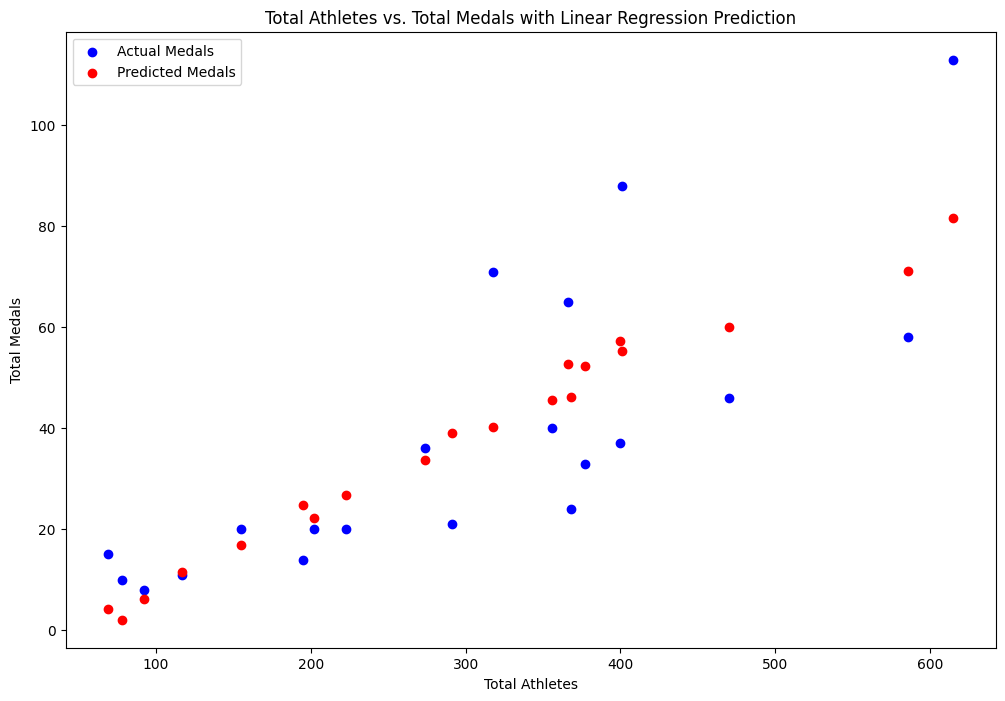

Intercept: -8.224755112327635
Coefficients: [ 0.1811251  -0.76515229]
Predicted total medals for new data: 88.9730177243733


In [94]:

# Assuming top_coach_counts is already defined as per the provided code
top_coach_counts = {
    'United States of America': {'Coach Count': 28, 'Total Athletes': 615, 'Total Medals': 113},
    'People\'s Republic of China': {'Coach Count': 12, 'Total Athletes': 401, 'Total Medals': 88},
    'Japan': {'Coach Count': 35, 'Total Athletes': 586, 'Total Medals': 58},
    'Great Britain': {'Coach Count': 7, 'Total Athletes': 366, 'Total Medals': 65},
    'ROC': {'Coach Count': 12, 'Total Athletes': 318, 'Total Medals': 71},
    'Australia': {'Coach Count': 22, 'Total Athletes': 470, 'Total Medals': 46},
    'Netherlands': {'Coach Count': 10, 'Total Athletes': 274, 'Total Medals': 36},
    'France': {'Coach Count': 10, 'Total Athletes': 377, 'Total Medals': 33},
    'Germany': {'Coach Count': 9, 'Total Athletes': 400, 'Total Medals': 37},
    'Italy': {'Coach Count': 14, 'Total Athletes': 356, 'Total Medals': 40},
    'Canada': {'Coach Count': 16, 'Total Athletes': 368, 'Total Medals': 24},
    'Brazil': {'Coach Count': 7, 'Total Athletes': 291, 'Total Medals': 21},
    'New Zealand': {'Coach Count': 8, 'Total Athletes': 202, 'Total Medals': 20},
    'Cuba': {'Coach Count': 0, 'Total Athletes': 69, 'Total Medals': 15},
    'Hungary': {'Coach Count': 4, 'Total Athletes': 155, 'Total Medals': 20},
    'Republic of Korea': {'Coach Count': 7, 'Total Athletes': 223, 'Total Medals': 20},
    'Poland': {'Coach Count': 3, 'Total Athletes': 195, 'Total Medals': 14},
    'Czech Republic': {'Coach Count': 2, 'Total Athletes': 117, 'Total Medals': 11},
    'Kenya': {'Coach Count': 5, 'Total Athletes': 78, 'Total Medals': 10},
    'Norway': {'Coach Count': 3, 'Total Athletes': 92, 'Total Medals': 8}
}

# Convert the dictionary to a DataFrame
df_top_countries = pd.DataFrame.from_dict(top_coach_counts, orient='index')
df_top_countries.reset_index(inplace=True)
df_top_countries.rename(columns={'index': 'Country'}, inplace=True)

# Prepare the data for linear regression
X = df_top_countries[['Total Athletes', 'Coach Count']]
y = df_top_countries['Total Medals']

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Make predictions
df_top_countries['Predicted Medals'] = reg.predict(X)

# Display actual and predicted medals
for index, row in df_top_countries.iterrows():
    print(f"Country: {row['Country']}, Coach Count: {row['Coach Count']}, Total Athletes: {row['Total Athletes']}, "
          f"Actual Medals: {row['Total Medals']}, Predicted Medals: {row['Predicted Medals']}")

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(df_top_countries['Total Athletes'], df_top_countries['Total Medals'], color='blue', label='Actual Medals')
plt.scatter(df_top_countries['Total Athletes'], df_top_countries['Predicted Medals'], color='red', label='Predicted Medals')
plt.xlabel('Total Athletes')
plt.ylabel('Total Medals')
plt.title('Total Athletes vs. Total Medals with Linear Regression Prediction')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients: {reg.coef_}")

# Example prediction with new data
# Replace with actual new data for real predictions
# PREDICTION FORMULA HERE !!!!!
new_data = pd.DataFrame({'Total Athletes': [600], 'Coach Count': [15]})
prediction = reg.predict(new_data)
print(f"Predicted total medals for new data: {prediction[0]}")
# Prediction Forula !!!!!!!

For the prediction I have used Total Athletes 600 and Coaches for 15 and the predicted percentage is about 88.97 which is close to United Stated 2021 results.

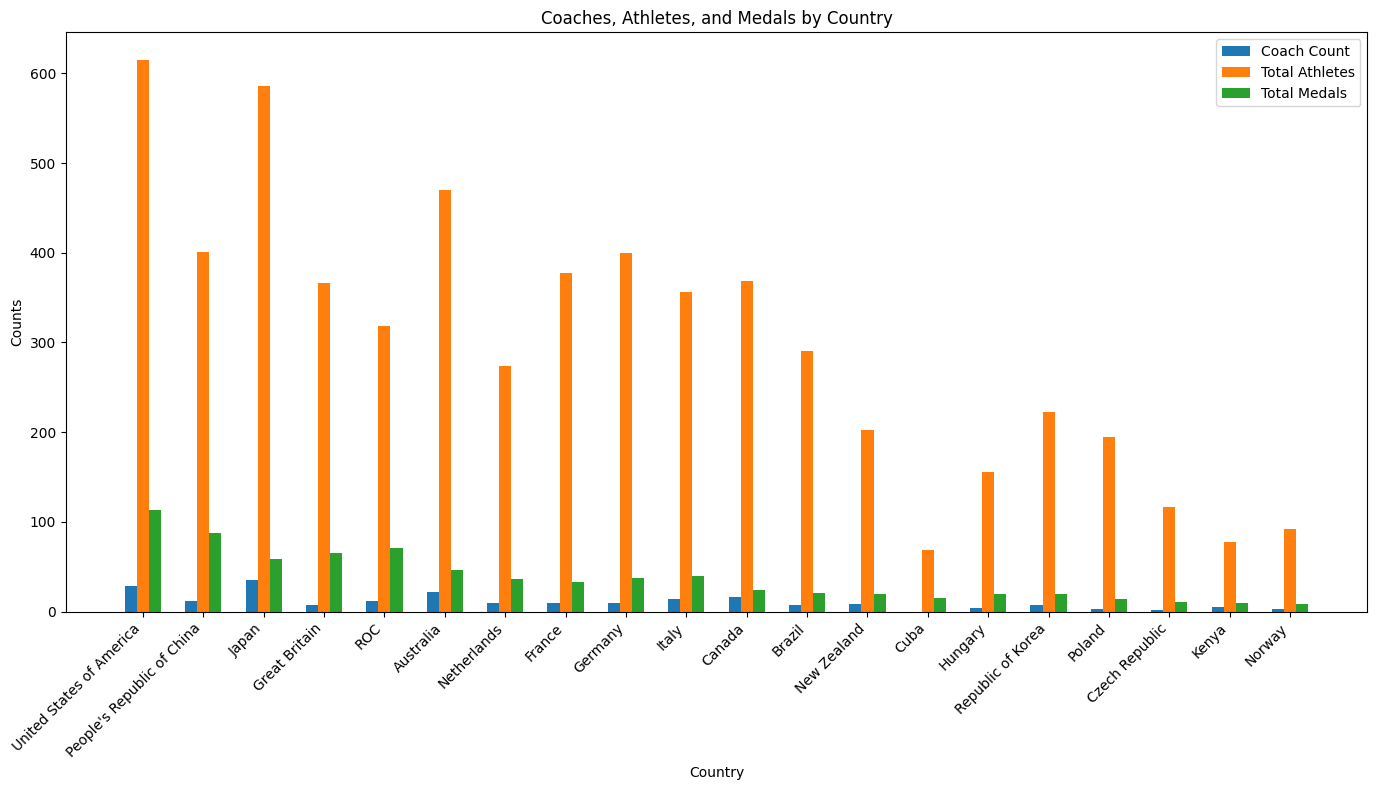

In [91]:
# Using the Data for Top 20 countries to see pattern in medals along with coaching staff and athletes total.
# Data for top 20 countries
data = {
    'United States of America': {'Coach Count': 28, 'Total Athletes': 615, 'Total Medals': 113},
    'People\'s Republic of China': {'Coach Count': 12, 'Total Athletes': 401, 'Total Medals': 88},
    'Japan': {'Coach Count': 35, 'Total Athletes': 586, 'Total Medals': 58},
    'Great Britain': {'Coach Count': 7, 'Total Athletes': 366, 'Total Medals': 65},
    'ROC': {'Coach Count': 12, 'Total Athletes': 318, 'Total Medals': 71},
    'Australia': {'Coach Count': 22, 'Total Athletes': 470, 'Total Medals': 46},
    'Netherlands': {'Coach Count': 10, 'Total Athletes': 274, 'Total Medals': 36},
    'France': {'Coach Count': 10, 'Total Athletes': 377, 'Total Medals': 33},
    'Germany': {'Coach Count': 9, 'Total Athletes': 400, 'Total Medals': 37},
    'Italy': {'Coach Count': 14, 'Total Athletes': 356, 'Total Medals': 40},
    'Canada': {'Coach Count': 16, 'Total Athletes': 368, 'Total Medals': 24},
    'Brazil': {'Coach Count': 7, 'Total Athletes': 291, 'Total Medals': 21},
    'New Zealand': {'Coach Count': 8, 'Total Athletes': 202, 'Total Medals': 20},
    'Cuba': {'Coach Count': 0, 'Total Athletes': 69, 'Total Medals': 15},
    'Hungary': {'Coach Count': 4, 'Total Athletes': 155, 'Total Medals': 20},
    'Republic of Korea': {'Coach Count': 7, 'Total Athletes': 223, 'Total Medals': 20},
    'Poland': {'Coach Count': 3, 'Total Athletes': 195, 'Total Medals': 14},
    'Czech Republic': {'Coach Count': 2, 'Total Athletes': 117, 'Total Medals': 11},
    'Kenya': {'Coach Count': 5, 'Total Athletes': 78, 'Total Medals': 10},
    'Norway': {'Coach Count': 3, 'Total Athletes': 92, 'Total Medals': 8}
}

countries = list(data.keys())
coach_counts = [data[country]['Coach Count'] for country in countries]
total_athletes = [data[country]['Total Athletes'] for country in countries]
total_medals = [data[country]['Total Medals'] for country in countries]

# Create bar chart
x = np.arange(len(countries))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(x - width, coach_counts, width, label='Coach Count')
bars2 = ax.bar(x, total_athletes, width, label='Total Athletes')
bars3 = ax.bar(x + width, total_medals, width, label='Total Medals')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Country')
ax.set_ylabel('Counts')
ax.set_title('Coaches, Athletes, and Medals by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()

The analysis of the provided dataset reveals a relationship between the number of athletes participating, the coaching staff, and the total medals won by the top 20 countries. Here are the key findings:

Number of Athletes:

Countries with a larger number of athletes tend to win more medals. For instance, the United States, with 615 athletes, won 113 medals, and Japan, with 586 athletes, won 58 medals.
The availability of more athletes increases the probability of winning medals due to higher participation in various events.

Coaching Staff:

The presence of a robust coaching staff also contributes to the success of countries. Japan, with the highest number of coaches (35), managed to win 58 medals, highlighting the importance of coaching in preparing athletes for competitions.
Countries like the United States (28 coaches) and Australia (22 coaches) also show that a well-supported coaching staff can lead to higher medal counts.

Combination of Athletes and Coaches:

A synergistic effect is observed when both a high number of athletes and a well-staffed coaching team are present. The United States, Japan, and Australia are prime examples where the combination of these factors has resulted in significant medal hauls.
Effective coaching maximizes the potential of a large pool of athletes, leading to better performance and more medals.

Outliers:

Some countries with fewer athletes still manage to win medals, indicating that quality and strategic participation also play a role. For example, New Zealand with 202 athletes won 20 medals, and Hungary with 155 athletes won 20 medals as well.
This suggests that while quantity matters, the quality of athletes and targeted efforts in specific events can also yield success.